<a href="https://colab.research.google.com/github/ewattudo/gis/blob/main/PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS2 - Mapping International Application Conversion
**Erick Watt-Udogu**

**Overview and Research Questions:** Over the past three years, both the campus and The Graduate School have seen a notable increase in international applications, admissions, and enrollments. This project disaggregates the application data to explore key research questions:

1.   Which countries contribute to graduate school enrollment?
2.   What are the conversion rates from application to enrollment across different countries?
3.   Do some countries show higher or lower conversion rates?
4.   Additionally, are there regional differences within countries like India, where most of our international students originate?

**Methodology:** Using accepted offers as a proxy for enrollment, student origin was determined based on mailing addresses. This data primarily focuses on new applicants from the past three academic years, providing insights into international application trends.

 AI tools were particularly useful in beautifying the visualizations, making the sizing and placement of elements much easier to handle. However, AI is not a replacement for the core narrative and data manipulation, which remain central to the analysis.


**Findings:**

* *Domestic vs. International Yield Rates:* The highest conversion rates come from
New Jersey, Pennsylvania, and New York—particularly New Jersey, where we yield 19% of applicants. International applications, especially from countries like India, show much lower yield rates (around 5%), while countries like Ghana and Nigeria yield as little as 3% to 5%, despite recent investment in those regions.
* *Regional and Programmatic Differences:* India is a consistent contributor, and regions like Telangana, Gujarat, and Andhra Pradesh produce more students than nearly any other international region. Indian students are heavily concentrated in Data Science and Computer Science programs, though recruitment efforts in South America don't align with this trend.
* *Unexpected Trends:* Bangladesh stands out for showing steady growth in student numbers despite little campus investment, whereas new initiatives to engage regions like Korea have yielded little traction in application or conversion data.

**Limitations:**

* *Admission vs. Enrollment Data:* This analysis uses admission data, which does not always reflect final enrollment. Enrollment data is more accurate but harder to access and requires specific requests.
* *Mailing Address as Proxy for Origin:* Using mailing addresses to determine origin can misrepresent students’ true backgrounds, as some applicants may be studying abroad when they apply, but are originally from different countries.
* *Focus on New Applicants:* The data focuses on new applicants, potentially underrepresenting programs such as PhD programs where students often remain in the program for multiple years.


**Future Study:** Future research should focus on domestic applications, particularly from New Jersey, to better understand trends in local conversion rates. Additionally, shifting from admission data to enrollment data will provide a more accurate picture of which applicants ultimately matriculate, offering a clearer understanding of conversion patterns.

# Set Up Code & Import Files
Run this for data and setup code.



In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [ ]:
!pip install geopandas==1.0.1
import pandas as pd
import urllib.request
import numpy as np

In [ ]:
#plotly
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted

In [ ]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [ ]:
import time, webbrowser, zipfile

import pandas as pd
import geopandas as gpd

from google.colab import data_table
data_table.enable_dataframe_formatter()

from google.colab import files

import folium as f
from folium.plugins import MarkerCluster, HeatMap

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

# Map Data Import and Merge

## World Map Import

In [ ]:
#I uploaded a different world map shapfile, but I like htis one better.
! wget -q -O Countries.zip https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip

zip_ref = zipfile.ZipFile('Countries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
Countries=gpd.read_file('/content/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')

### Getting to Know World Data

In [ ]:
#I need to familiarize myself with the data for the merge. First I want to see how the country names are displayed, so I can merge based on country name.
Countries.head(3)

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,None,260580739,17,3028000.0,2017,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,2,Admin-0 country,2,Sovereign country,Malaysia,None,31381992,15,863000.0,2017,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,3,Admin-0 country,2,Sovereign country,Republic of Chile,None,17789267,14,436100.0,2017,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [ ]:
#WB_Name looks good, It's closest to the names I have in my files. I need to see a list of all the names in the file to see how they are presented.
print(Countries.WB_NAME.unique())

['Indonesia' 'Malaysia' 'Chile' 'Bolivia' 'Peru' 'Argentina' 'Cyprus'
 'India' 'China' 'Israel' 'West Bank and Gaza' 'Lebanon' 'Ethiopia'
 'South Sudan' 'Somalia' 'Kenya' 'Pakistan' 'Malawi' 'Tanzania'
 'Syrian Arab Republic' 'France' 'Suriname' 'Guyana' 'Korea, Republic of'
 "Korea, Democratic People's Republic of" 'Morocco' 'Costa Rica'
 'Nicaragua' 'Congo, Rep. of' 'Congo, Democratic Republic of' 'Bhutan'
 'Ukraine' 'Belarus' 'Namibia' 'South Africa' 'Saint-Martin (Fr.)'
 'Sint Maarten (Neth.)' 'Oman' 'Uzbekistan' 'Kazakhstan' 'Tajikistan'
 'Lithuania' 'Brazil' 'Uruguay' 'Mongolia' 'Russian Federation'
 'Czech Republic' 'Germany' 'Estonia' 'Latvia' 'Norway' 'Sweden' 'Finland'
 'Vietnam' 'Cambodia' 'Luxembourg' 'United Arab Emirates' 'Belgium'
 'Georgia' 'North Macedonia' 'Albania' 'Azerbaijan' 'Kosovo' 'Turkey'
 'Spain' "Lao People's Democratic Republic" 'Kyrgyz Republic' 'Armenia'
 'Denmark' 'Libya' 'Tunisia' 'Romania' 'Hungary' 'Slovak Republic'
 'Poland' 'Ireland' 'United Kingdom

In [ ]:
#renaming for merge
Countries = Countries.rename(columns={'WB_NAME':'Country'})

### Importing World Application Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/gis/refs/heads/main/World%20AC.csv", "WorldApp.csv")

('WorldApp.csv', <http.client.HTTPMessage at 0x7b21801ae350>)

In [ ]:
WorldApp = pd.read_csv('WorldApp.csv')

### Merging World Map Data

In [ ]:
#Merging World Map with World AC Data
WORLDACMAP = pd.merge(Countries, WorldApp, on='Country',how='outer',indicator=True)
WORLDACMAP[['Country','2022-2023','2023-2024','2024-2025','Grand Total','_merge']]

,Country,2022-2023,2023-2024,2024-2025,Grand Total,_merge
0,Afghanistan,NaN,NaN,NaN,NaN,left_only
1,Albania,NaN,NaN,NaN,NaN,left_only
2,Algeria,NaN,NaN,NaN,NaN,left_only
3,American Samoa (US),NaN,NaN,NaN,NaN,left_only
4,Andorra,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...
246,West Bank and Gaza,NaN,NaN,NaN,NaN,left_only
247,"Yemen, Republic of",NaN,NaN,NaN,NaN,left_only
248,Zambia,NaN,NaN,NaN,NaN,left_only
249,Zimbabwe,NaN,NaN,NaN,NaN,left_only


In [ ]:
#Need to get rid of the NaNs
WORLDACMAP['2022-2023'] = WORLDACMAP['2022-2023'].fillna(0)
WORLDACMAP['2023-2024'] = WORLDACMAP['2023-2024'].fillna(0)
WORLDACMAP['2024-2025'] = WORLDACMAP['2024-2025'].fillna(0)
WORLDACMAP['Grand Total'] = WORLDACMAP['Grand Total'].fillna(0)

### Importing World Map Data for Program Analysis

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/gis/refs/heads/main/downpipe.csv", "downpipe.csv")

('downpipe.csv', <http.client.HTTPMessage at 0x7b21741799f0>)

In [ ]:
Down = pd.read_csv('downpipe.csv')

## US Map Import

In [ ]:
! wget -q -O US.zip https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

zip_ref = zipfile.ZipFile('US.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
US=gpd.read_file('/content/cb_2018_us_state_500k.shp')

## Getting to Know US Data

In [ ]:
#I need to familiarize myself with the data for the merge. First I want to see how the State names are displayed, so I can merge based on state name.
US.head(1)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."


In [ ]:
#Same as for World. Name field looks like state names. I'll merge based on the these.
print(US.NAME.unique())

['Mississippi' 'North Carolina' 'Oklahoma' 'Virginia' 'West Virginia'
 'Louisiana' 'Michigan' 'Massachusetts' 'Idaho' 'Florida' 'Nebraska'
 'Washington' 'New Mexico' 'Puerto Rico' 'South Dakota' 'Texas'
 'California' 'Alabama' 'Georgia' 'Pennsylvania' 'Missouri' 'Colorado'
 'Utah' 'Tennessee' 'Wyoming' 'New York' 'Kansas' 'Alaska' 'Nevada'
 'Illinois' 'Vermont' 'Montana' 'Iowa' 'South Carolina' 'New Hampshire'
 'Arizona' 'District of Columbia' 'American Samoa'
 'United States Virgin Islands' 'New Jersey' 'Maryland' 'Maine' 'Hawaii'
 'Delaware' 'Guam' 'Commonwealth of the Northern Mariana Islands'
 'Rhode Island' 'Kentucky' 'Ohio' 'Wisconsin' 'Oregon' 'North Dakota'
 'Arkansas' 'Indiana' 'Minnesota' 'Connecticut']


In [ ]:
#renaming for merge
US = US.rename(columns={'NAME':'State'})

### Importing US Application Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/gis/refs/heads/main/State%20AC.csv", "USApp.csv")

('USApp.csv', <http.client.HTTPMessage at 0x7b21801f49d0>)

In [ ]:
USApp = pd.read_csv('USApp.csv')

### Merging US Map Data

In [ ]:
#Merging US Map with US AC Data
USACMAP = pd.merge(US, USApp, on='State',how='outer',indicator=True)
USACMAP[['State','Total','_merge']]

,State,Total,_merge
0,Alabama,1.0,both
1,Alaska,NaN,left_only
2,American Samoa,NaN,left_only
3,Arizona,NaN,left_only
4,Arkansas,1.0,both
5,California,13.0,both
6,Colorado,2.0,both
7,Commonwealth of the Northern Mariana Islands,NaN,left_only
8,Connecticut,3.0,both
9,Delaware,1.0,both


In [ ]:
#Need to get rid of the NaNs
USACMAP['Total'] = USACMAP['Total'].fillna(0)

In [ ]:
# I just want the lower 48 since we don't have students in states like Alaska
LOWERACMAP = USACMAP[~USACMAP['State'].isin(['Alaska', 'Hawaii', 'Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]

## India Map Import

In [ ]:
! wget -q -O India.zip https://github.com/datameet/maps/archive/master.zip

zip_ref = zipfile.ZipFile('India.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
India=gpd.read_file('/content/maps-master/States/Admin2.shp')

### Getting to Know India Data

In [ ]:
print(India.ST_NM.unique())

['Arunachal Pradesh' 'Assam' 'Chandigarh' 'Karnataka' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Punjab' 'Rajasthan' 'Sikkim' 'Tripura'
 'Uttarakhand' 'Telangana' 'Bihar' 'Kerala' 'Madhya Pradesh'
 'Andaman & Nicobar' 'Gujarat' 'Lakshadweep' 'Odisha'
 'Dadra and Nagar Haveli and Daman and Diu' 'Jammu & Kashmir'
 'Chhattisgarh' 'Delhi' 'Goa' 'Haryana' 'Himachal Pradesh' 'Jharkhand'
 'Tamil Nadu' 'Uttar Pradesh' 'West Bengal' 'Andhra Pradesh' 'Puducherry'
 'Maharashtra' 'Ladakh']


In [ ]:
#renaming for merge
India = India.rename(columns={'ST_NM':'State'})

### Importing Indian Application Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/gis/refs/heads/main/Indian%20States.csv", "India.csv")

('India.csv', <http.client.HTTPMessage at 0x7b21743c63b0>)

In [ ]:
InApp = pd.read_csv('India.csv')

### Merging Indian Map Data

In [ ]:
#Merging US Map with US AC Data
INACMAP = pd.merge(India, InApp, on='State',how='outer',indicator=True)
INACMAP[['State','Total','_merge']]

,State,Total,_merge
0,Andaman & Nicobar,NaN,left_only
1,Andhra Pradesh,17.0,both
2,Arunachal Pradesh,NaN,left_only
3,Assam,NaN,left_only
4,Bihar,NaN,left_only
5,Chandigarh,NaN,left_only
6,Chhattisgarh,1.0,both
7,Dadra and Nagar Haveli and Daman and Diu,NaN,left_only
8,Delhi,6.0,both
9,Goa,NaN,left_only


In [ ]:
#Need to get rid of the NaNs
INACMAP['Total'] = INACMAP['Total'].fillna(0)

# Visualizations

In [ ]:
fig = px.treemap(WorldApp, path=[px.Constant("Accepted Offers by Country"), 'Continent', 'Country'], values='Grand Total',
                  color='AC/App%', hover_data=['Country'],
                  color_continuous_scale='RdBu_r',
                  color_continuous_midpoint=np.average(WorldApp['AC/App%'], weights=WorldApp['Grand Total']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

(0.0, 20.0)

(0.0, 1.1)

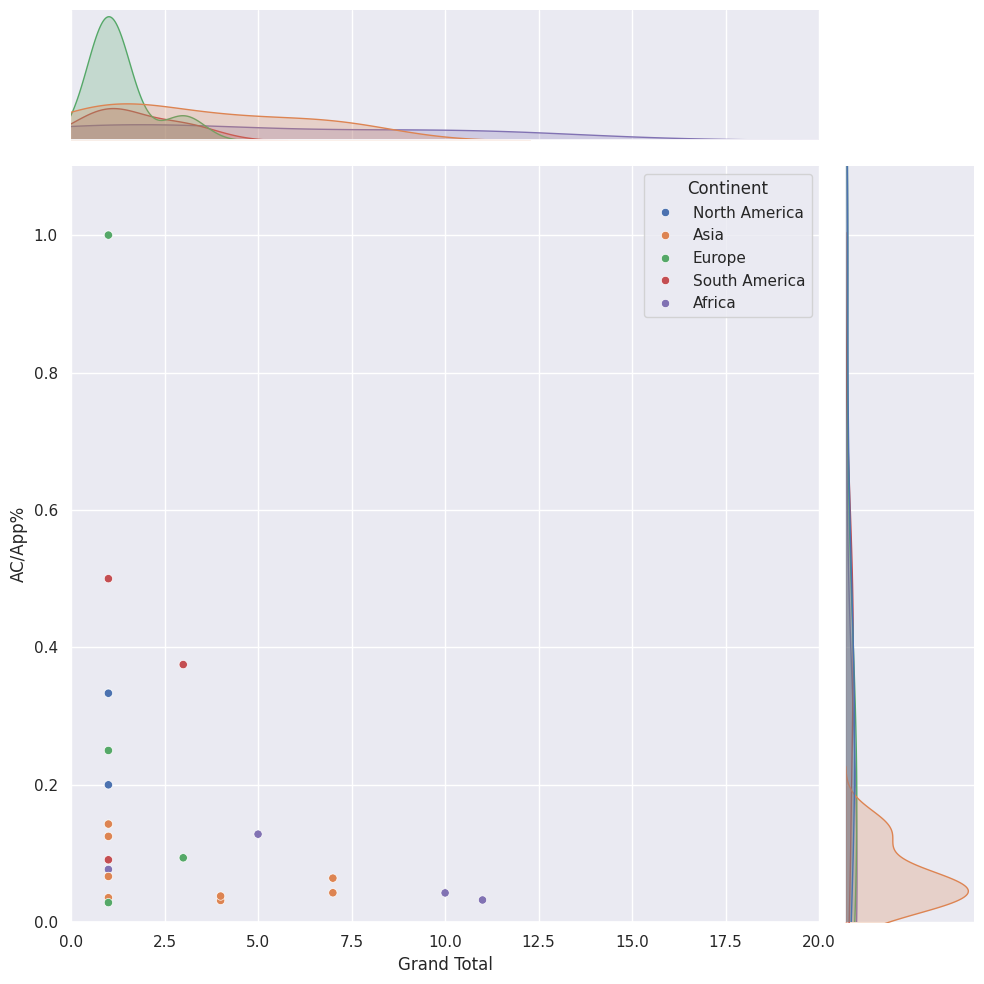

In [ ]:
# Used AI to make it plot bigger and for the code to change the min and max of each axis. I tried to add lebels, but I never liked the output. Next time, I am going to use plotly. I like SNS, but interactive plots are more useful for my work, I am not printing this.
# Filter the data to exclude the USA and India - the outliers.Previous versions of this with the US and India are effectively useless.
WorldAppSansOut = WorldApp[~WorldApp['Country'].isin(['United States of America', 'India'])]

# Create the joint plot with a larger size
sns_plot = sns.jointplot(data=WorldAppSansOut, x="Grand Total", y="AC/App%", hue="Continent", height=10)

# Set the x and y axis limits
sns_plot.ax_joint.set_xlim(0, 20)
sns_plot.ax_joint.set_ylim(0, 1.1)

# Show the plot
plt.show()

In [ ]:
WORLDACTARGET=WORLDACMAP.query(("Country=='Nigeria' | Country=='Ghana'| Country=='Paraguay'| Country=='Korea, Republic of'"))

In [ ]:
WORLDACMAP.head(1)

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,Shape_Area,geometry,Continent,2022-2023,2023-2024,2024-2025,Grand Total,AC/App%,Mid,_merge
0,126,Admin-0 country,2,Sovereign country,Islamic State of Afghanistan,None,34124811,15,64080.0,2017,...,62.591664,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",NaN,0.0,0.0,0.0,0.0,NaN,NaN,left_only


<Axes: >

<Axes: >

Text(-180, 95, 'Global Students in the')

Text(-180, 86, 'Rutgers Graduate School-Camden')

[]

[]

Text(23.6753, 14.082, '')

Text(24.6753, 14.582, 'Campus Target: Nigeria')

Text(8.9768, 17.9465, '')

Text(9.9768, 18.9465, 'Campus Target: Ghana')

Text(137.76690000000002, 45.9078, '')

Text(138.76690000000002, 46.9078, 'Campus Target: Korea')

Text(-48.4438, -13.442499999999999, '')

Text(-47.4438, -12.442499999999999, 'Campus Target: Paraguay')

Text(-74, 40, '70% of all students\n89% of domestic students\ncome from NJ/NY/PA')

Text(78, 22, '68%\n of intl students\nfrom India')

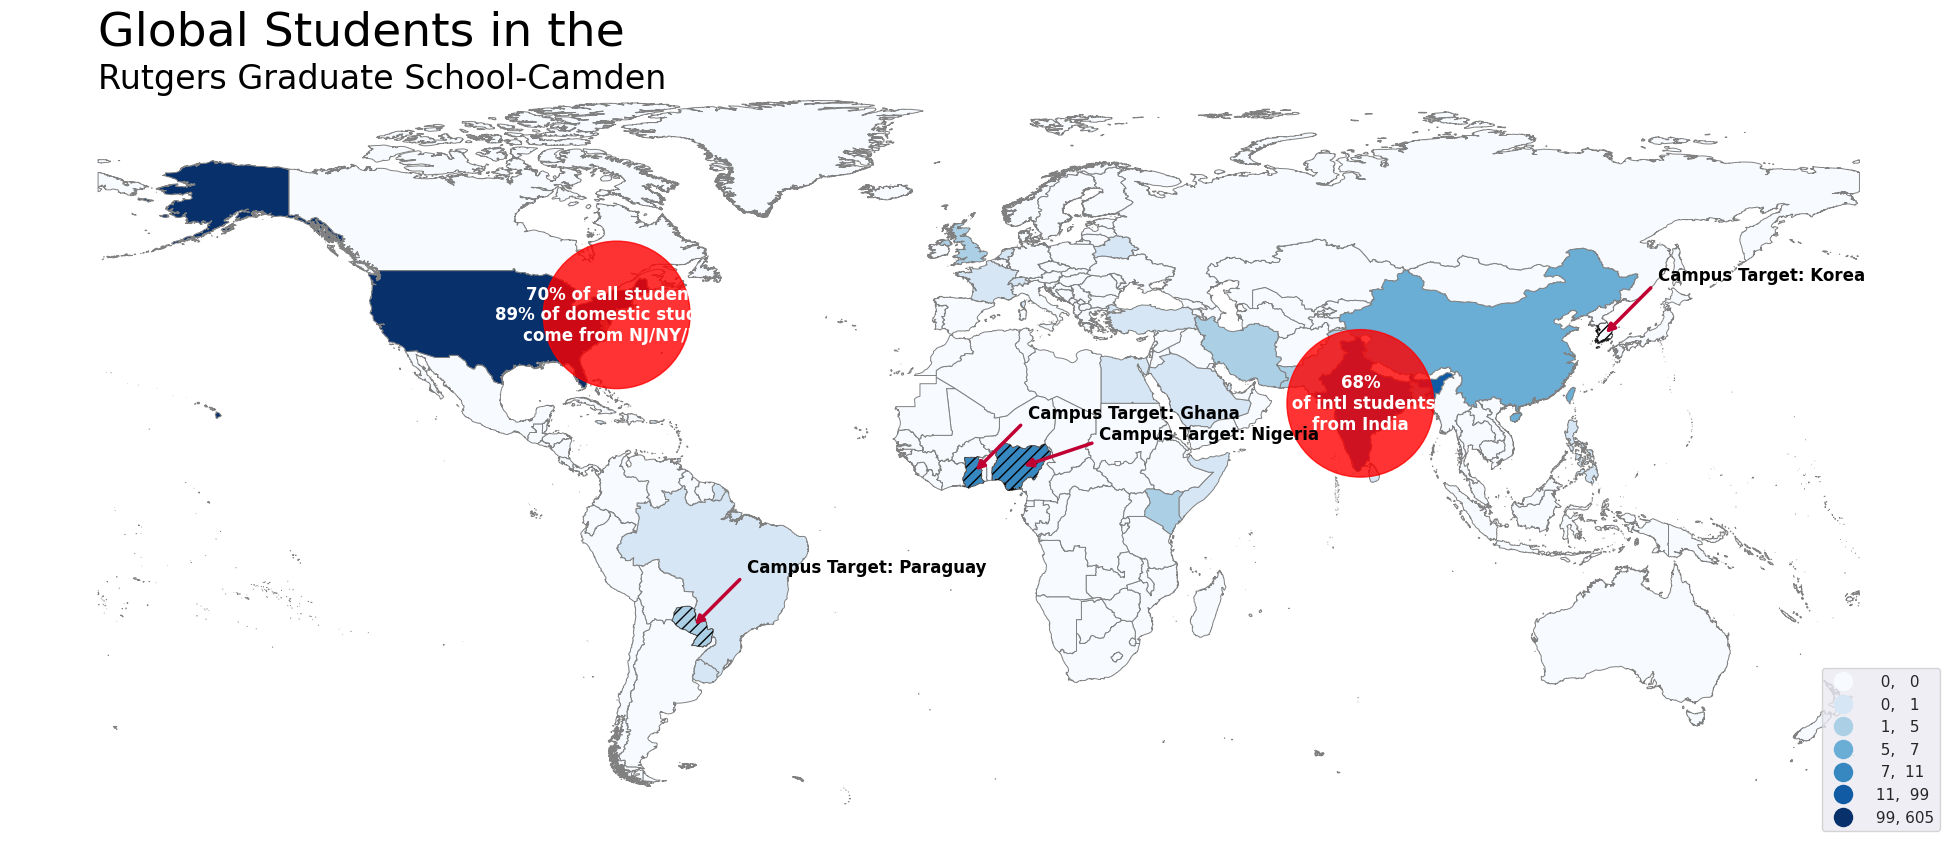

In [107]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(25, 50))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Plot WORLDACMAP with the 'Grand Total' column
WORLDACMAP.plot(ax=ax, column='Grand Total', legend=True, cmap='Blues',
                scheme='natural_breaks', k=7, edgecolor='grey', linewidth=0.7,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})

# Overlay WORLDACTARGET with hatching
WORLDACTARGET.plot(ax=ax, edgecolor='black', linewidth=0.2, facecolor="none", alpha=1, hatch='///')

# Adjust title size and color
ax.text(-180, 95, "Global Students in the", fontsize=34, color='black', fontweight='light', ha='left')
ax.text(-180, 86, "Rutgers Graduate School-Camden", fontsize=24, color='black', fontweight='light', ha='left')

# Remove the border (spines) around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Coordinates for Nigeria, Ghana, Korea, and Paraguay
country_coords = {
    "Campus Target: Nigeria": (8.6753, 9.0820),  # (Longitude, Latitude)
    "Campus Target: Ghana": (-1.0232, 7.9465),
    "Campus Target: Korea": (127.7669, 35.9078),  # South Korea
    "Campus Target: Paraguay": (-58.4438, -23.4425)
}

# Add red arrows and country names
for country, (lon, lat) in country_coords.items():
    if country == "Campus Target: Nigeria":
        # Adjust arrow and text position for Nigeria
        ax.annotate(
            '', xy=(lon, lat), xytext=(lon + 15, lat + 5),
            arrowprops=dict(facecolor='#c00033', edgecolor='#c00033', arrowstyle='-|>', lw=2.5)
        )
        ax.text(lon + 16, lat + 5.5, country, fontsize=12, color='black', fontweight='bold')
    else:
        # Default arrow and text position for other countries
        ax.annotate(
            '', xy=(lon, lat), xytext=(lon + 10, lat + 10),
            arrowprops=dict(facecolor='#c00033', edgecolor='#c00033', arrowstyle='-|>', lw=2.5)
        )
        ax.text(lon + 11, lat + 11, country, fontsize=12, color='black', fontweight='bold')

# Add larger opaque red circles with text for the Northeast US and India
# Northeast US
circle_nj = mpatches.Circle((-74, 40), radius=15, color='red', alpha=0.8)  # Larger circle for NJ/NY/PA
ax.add_patch(circle_nj)
ax.text(-74, 40, "70% of all students\n89% of domestic students\ncome from NJ/NY/PA",
        fontsize=12, color='white', ha='center', va='center', fontweight='bold')

# India
circle_india = mpatches.Circle((78, 22), radius=15, color='red', alpha=0.8)  # Larger circle for India
ax.add_patch(circle_india)
ax.text(78, 22, "68%\n of intl students\nfrom India",
        fontsize=12, color='white', ha='center', va='center', fontweight='bold')

plt.show()

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:687: UserWarning: Not enough unique values in array to form 7 classes. Setting k to 5.
  self._classify()


<Axes: >

Text(0.5, 1.0, 'Academic Year 2022-2023')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Academic Year 2023-2024')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Academic Year  2024-2025')

[]

[]

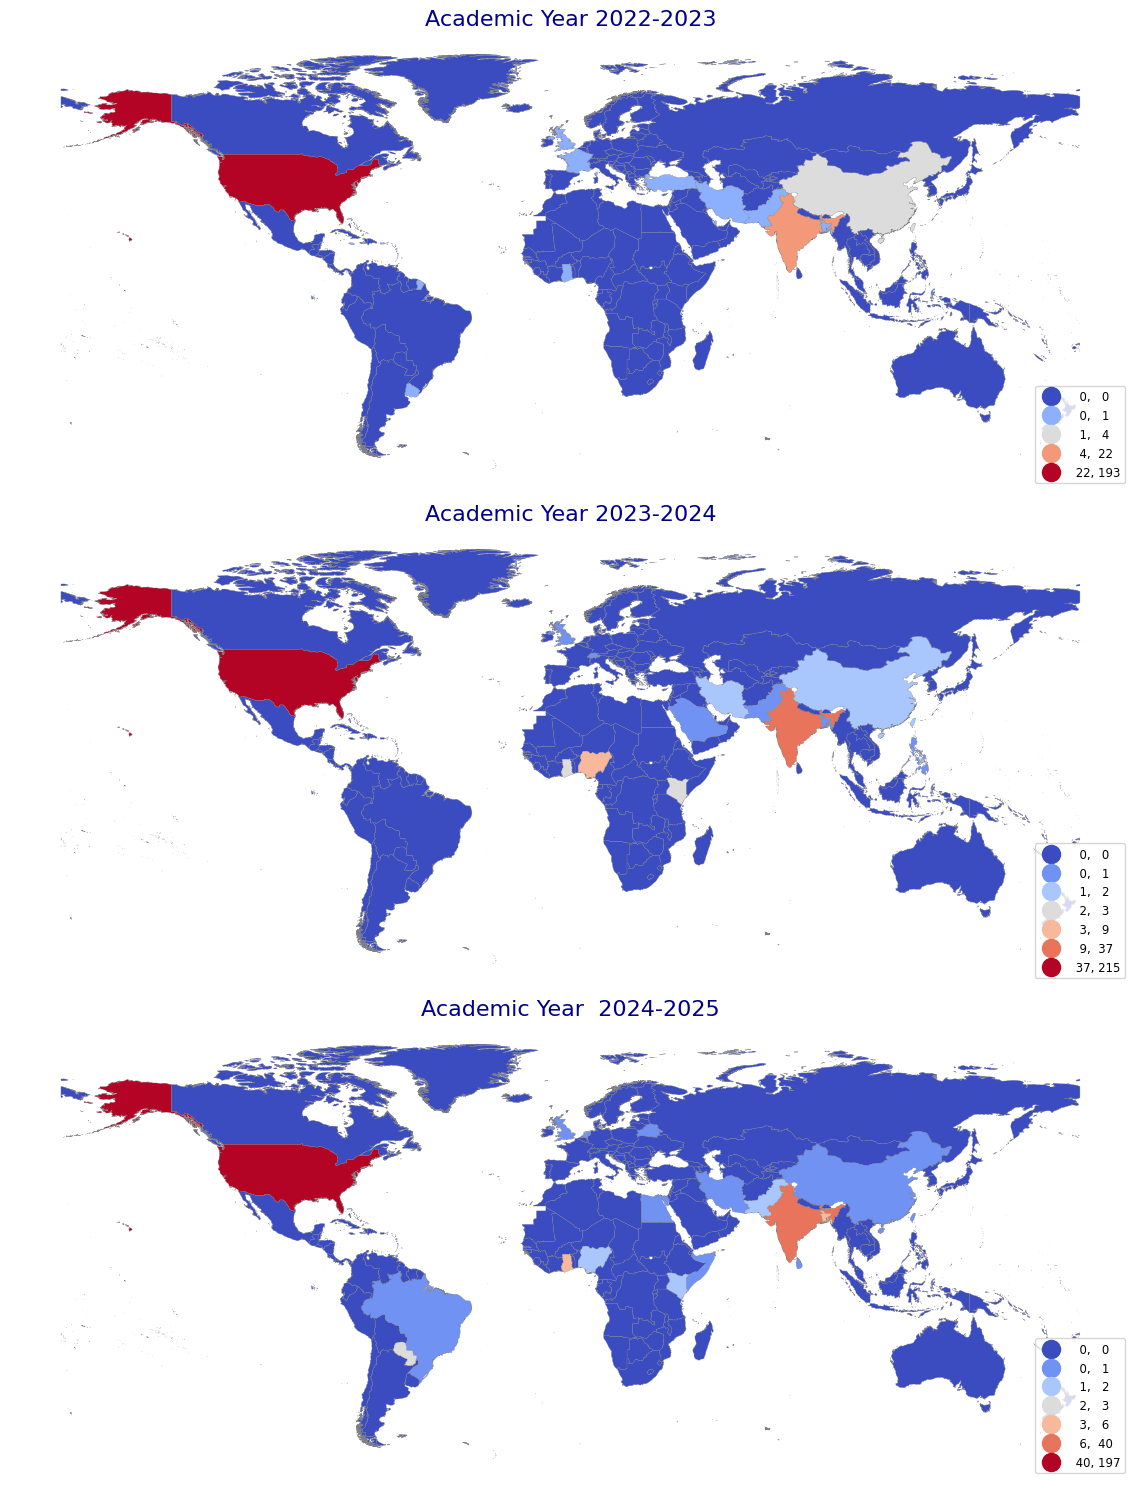

In [ ]:
# I played with horizontal and vertical, the horizontal doesn't look as nice as the vertical. I think it's easier to see this way but I am not sure it does as good of a job of conveying te passage of time.
fig, axs = plt.subplots(3, 1, figsize=(30, 15), sharey=True, tight_layout=True)

# Plot for 2022-2023
WORLDACMAP.plot(ax=axs[0], column='2022-2023', legend=True, cmap='coolwarm', scheme='natural_breaks', k=7,
                edgecolor='grey', linewidth=0.2,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                             'fontsize': 'small', 'markerscale': 1.4})
axs[0].set_title("Academic Year 2022-2023", fontsize=16, fontweight='light', color='darkblue')
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_yticks([])  # Remove y-axis ticks
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)

# Plot for 2023-2024
WORLDACMAP.plot(ax=axs[1], column='2023-2024', legend=True, cmap='coolwarm', scheme='natural_breaks', k=7,
                edgecolor='grey', linewidth=0.2,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                             'fontsize': 'small', 'markerscale': 1.4})
axs[1].set_title("Academic Year 2023-2024", fontsize=16, fontweight='light', color='darkblue')
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_yticks([])  # Remove y-axis ticks
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)

# Plot for 2024-2025
WORLDACMAP.plot(ax=axs[2], column='2024-2025', legend=True, cmap='coolwarm', scheme='natural_breaks', k=7,
                edgecolor='grey', linewidth=0.2,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                             'fontsize': 'small', 'markerscale': 1.4})
axs[2].set_title("Academic Year 2024-2025", fontsize=16, fontweight='light', color='darkblue')
axs[2].set_xticks([])  # Remove x-axis ticks
axs[2].set_yticks([])  # Remove y-axis ticks
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['left'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)

plt.show()


In [ ]:
#I really like this. I haven't ever seen the data displayed like this. I think it always helps to disaggregate the data. This visualization also helped me to see the weakness of using application rather than enrollment data. This makes sense for applicationdata but it doesn't quite match enrollment trends. CCIB and Public Affairs are big programs in terms of enrollment because they have students whose time to completion is greatewr than 5 years. That's missing here.
import plotly.express as px
fig = px.sunburst(Down, path=['Country', 'Program'], values='Total')
fig.show()
import plotly.express as px
fig = px.sunburst(Down, path=['Program', 'Country'], values='Total')
fig.show()

## US and Indian State Maps

In [ ]:
INLARGEAC=INACMAP.query(("State=='Andhra Pradesh' | State=='Gujarat'| State=='Telangana'"))

<Axes: >

<Axes: >

[]

[]

Text(0.5, 1.0, 'Graduate Accepted Applications: States in India')

Text(92.95948387336387, 11.199541042693056, 'Andaman & Nicobar')

Text(79.96560115870362, 15.756188548116365, 'Andhra Pradesh')

Text(94.67514884534478, 28.035983508470032, 'Arunachal Pradesh')

Text(92.82565517581044, 26.354745062545838, 'Assam')

Text(85.60994566511643, 25.67946207446309, 'Bihar')

Text(76.78050401018278, 30.72934960270708, 'Chandigarh')

Text(82.04112186171962, 21.26645875952401, 'Chhattisgarh')

Text(72.92849608672093, 20.245118984336273, 'Dadra and Nagar Haveli and Daman and Diu')

Text(77.11549314736455, 28.643392815408134, 'Delhi')

Text(74.05398331343198, 15.363767147626506, 'Goa')

Text(71.5724501951659, 22.698437987437927, 'Gujarat')

Text(76.34020980318124, 29.19815761009355, 'Haryana')

Text(77.2445948160565, 31.926098496930265, 'Himachal Pradesh')

Text(74.85724805510058, 33.672467113692214, 'Jammu & Kashmir')

Text(85.56411439422463, 23.65625985813127, 'Jharkhand')

Text(76.16741712359317, 14.710270408464616, 'Karnataka')

Text(76.40865876175909, 10.450437136473216, 'Kerala')

Text(76.79646111972474, 34.94391181082297, 'Ladakh')

Text(72.9534676502165, 10.44939498028919, 'Lakshadweep')

Text(78.28890075158407, 23.538007959946388, 'Madhya Pradesh')

Text(76.10757597660556, 19.451474546972655, 'Maharashtra')

Text(93.87865655892482, 24.734961377090688, 'Manipur')

Text(91.27730282419802, 25.535573521328555, 'Meghalaya')

Text(92.83175828538377, 23.307712520196052, 'Mizoram')

Text(94.46681085820309, 26.06293365378879, 'Nagaland')

Text(84.43031290877887, 20.5139037609297, 'Odisha')

Text(79.84965649240567, 11.912502923280497, 'Puducherry')

Text(75.41537705942727, 30.84248466622915, 'Punjab')

Text(73.84973115887396, 26.584438373170933, 'Rajasthan')

Text(88.47336513590598, 27.569857353436348, 'Sikkim')

Text(78.40831097415727, 11.013587250909032, 'Tamil Nadu')

Text(79.00841273366626, 17.800787262719094, 'Telangana')

Text(91.7391936151082, 23.744936092888548, 'Tripura')

Text(80.56598279591738, 26.92303179897883, 'Uttar Pradesh')

Text(79.20670524205006, 30.156502498631664, 'Uttarakhand')

Text(87.9839584110878, 23.810441895302212, 'West Bengal')

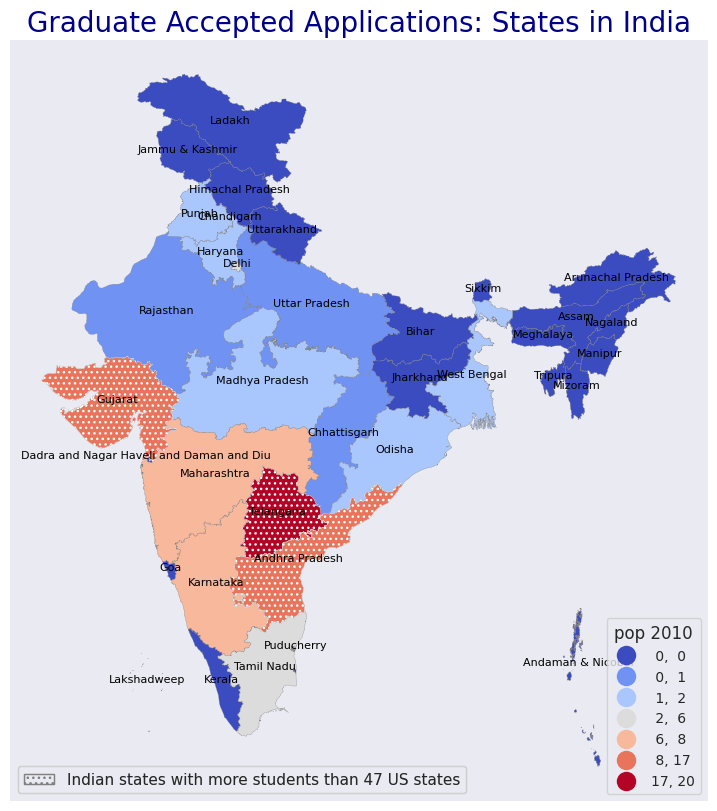

In [ ]:
#I used AI to add labels, I'm not in love with it though
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, figsize=(9, 15))

# Plot INACMAP
INACMAP.plot(
    ax=ax, column='Total', legend=True, cmap='coolwarm', scheme='natural_breaks', k=7,
    edgecolor='grey', linewidth=0.2,
    legend_kwds={
        "fmt": "{:,.0f}",
        'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4
    }
)

# Overlay INLARGEAC with hatching
INLARGEAC.plot(
    ax=ax, edgecolor='white', linewidth=0.2, facecolor="none", alpha=1, hatch='...'
)

# Remove the border and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Add a title with custom size and color
ax.set_title("Graduate Accepted Applications: States in India", fontsize=20, color='darkblue')

# Display the labels from the "State" field
for idx, row in INACMAP.iterrows():
    # Change 's' to 'text' to provide the annotation text
    ax.annotate(text=row['State'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=8, color='black')

# Customize the legend
l1 = ax.get_legend()
l1.set_title('''pop 2010''')

# Add a custom legend for the INLARGEAC hatching
blue_patch = mpatches.Patch(edgecolor='grey', facecolor='none',
                            hatch='...', label=r'Indian states with more students than 47 US states')
l2 = plt.legend(handles=[blue_patch], loc='lower left')

# Add both legends
ax.add_artist(l2)
ax.add_artist(l1)

plt.show()